<a href="https://colab.research.google.com/github/ArtorNado/ml4/blob/cMeans/cMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np

colors = [
        "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87"
]

In [11]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def getCurU(x_c, y_c, x, y, x_cur_c, y_cur_c, m):
    sum = 0
    for i in range(0, len(x_c)):
        sum = sum + (dist(x, y, x_cur_c, y_cur_c) / dist(x, y, x_c[i], y_c[i])) ** (2 / (1 - m))
    return sum

def cluster(k, x, y, x_c, y_c, m, clust):
    for i in range(0, len(x)):
        sum = 0

        for j in range(0, len(x_c)):
            clust[i][j] = getCurU(x_c, y_c, x[i], y[i], x_c[j], y_c[j], m)
            sum += clust[i][j]

        for j in range(0, len(x_c)):
            clust[i][j] /= sum

def recalc_centers(k, x, y, x_c, y_c, clust, m, should_draw = True):
    for i in range(0, k):
        count = 0
        num_x = 0
        num_y = 0
        denum_x = 0
        denum_y = 0

        for j in range(0, len(x)):
            num_x += pow(clust[j][i], m) * x[j]
            denum_x += pow(clust[j][i], m)
            num_y += pow(clust[j][i], m) * y[j]
            denum_y += pow(clust[j][i], m)

        x_c[i] = num_x / denum_x
        y_c[i] = num_y / denum_y

    # раскрашиваем кластеры
    if should_draw == True:

      for i in range(0, k):
        px, py = [], []

        for j in range(len(x)):
          # раскрашиваем точку в цвет,
          # которая с наибольшей вероятностью 
          # относится к i-ому классу
          max_value = np.max(clust[j])
          max_value_index = clust[j].index(max_value)

          if max_value_index == i:
            px.append(x[j])
            py.append(y[j])

        plt.scatter(px, py, color=colors[i], alpha=0.4)

      plt.scatter(x_c, y_c, color="#000000")
      plt.show()

def decision_function(x, y, x_c, y_c, clust):
    result = 0

    for j in range(0, len(x)):
        prob_array = clust[j]
        for i in range(0, len(prob_array)):
            result += prob_array[i] * dist(x[j], y[j], x_c[i], y_c[i])
    return result

def kStep(k, m):
    n = 100
    x = np.random.randint(1, 100, n)
    y = np.random.randint(1, 100, n)

    x_cc = np.mean(x)
    y_cc = np.mean(y)
    r = []

    #создаем массив по кол-ву точек с массивами вероятностей отношения точки к определенноу кластеру по количеству кластеров
    clust = [[0] * k for t in range(len(x))]

    for i in range(0, n):
        r.append(dist(x[i], y[i], x_cc, y_cc))
        
    R = max(r)
    x_c, y_c = [], []

    for i in range(0, k):
        x_c.append(R * np.cos(2 * np.pi * i / k) + x_cc)
        y_c.append(R * np.sin(2 * np.pi * i / k) + y_cc)

    plt.scatter(x, y)
    plt.scatter(x_c, y_c, color='#000000')
    plt.show()

    current_decision = 1
    previous_decision = current_decision
    cluster(k, x, y, x_c, y_c, m, clust)
    current_decision = decision_function(x, y, x_c, y_c, clust)

    while abs(previous_decision - current_decision) > 0.2:
        previous_decision = current_decision
        recalc_centers(k, x, y, x_c, y_c, clust, m)
        cluster(k, x, y, x_c, y_c, m, clust)
        current_decision = decision_function(x, y, x_c, y_c, clust)

def main():
    kStep(4, 1.5)


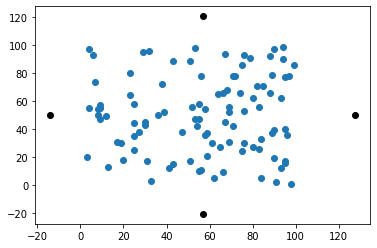

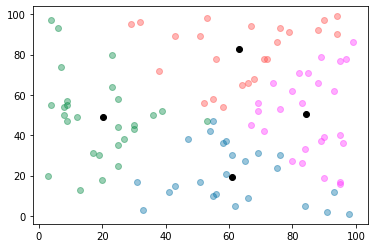

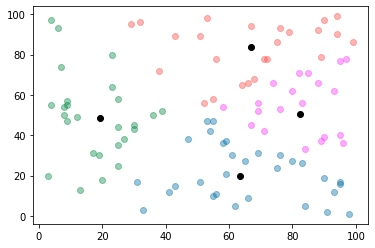

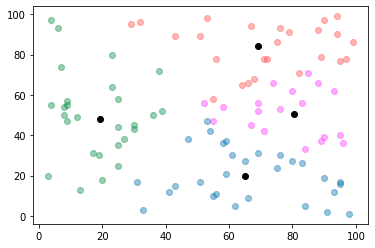

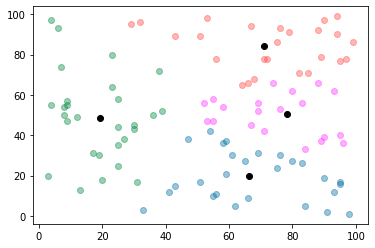

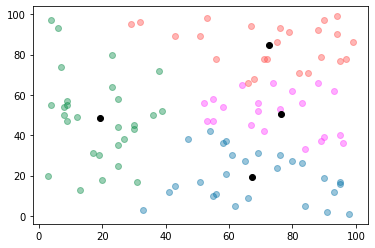

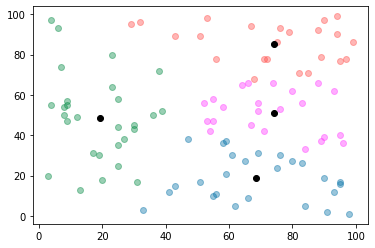

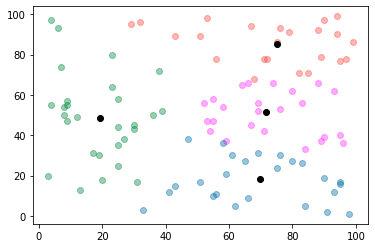

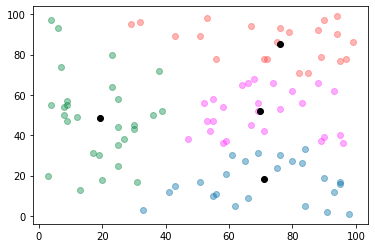

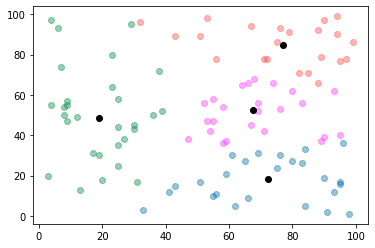

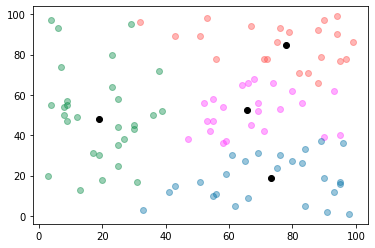

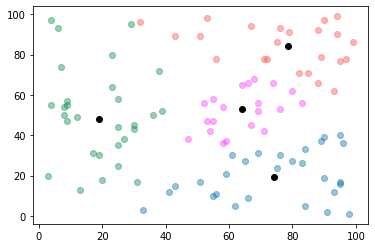

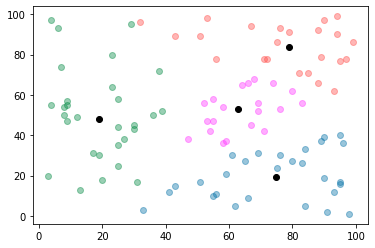

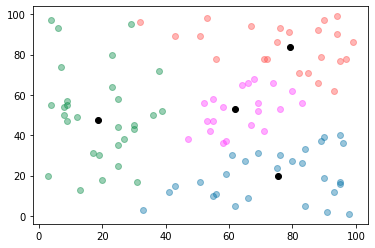

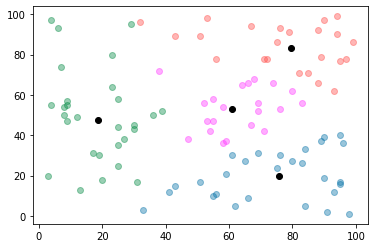

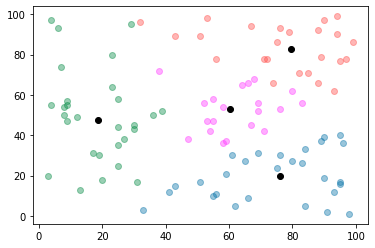

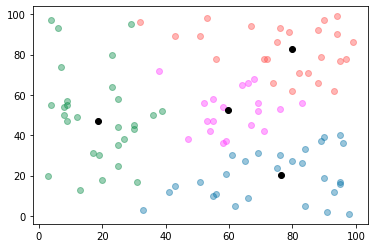

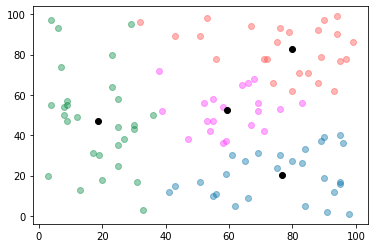

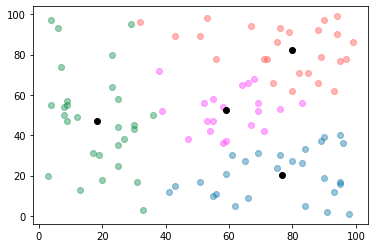

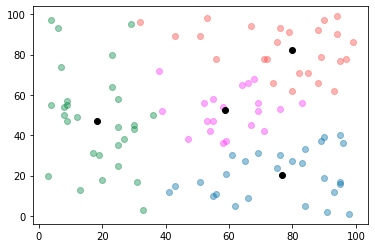

In [12]:
main()